In [1]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/benvictoria17/DataAnalytics/main/dataset/China%20College%20Entrance%20Examination%20Admission/02-RawData.csv', encoding='utf8')
df.head(2)

,BY,CEEY,NBP,UEE,GDP-BY,GDP-CEEY,CEEP,CEEA,CEEAR,GER
0,1959,1977,1635,0,550.0,1749.4,570.0,27.0,4.74%,1.65%
1,1960,1978,1402,0,597.2,1495.4,610.0,40.2,6.59%,2.87%


In [3]:
def resumetable(df):
    '''function to create feature summary'''
    print(f'Shape: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['Data Type'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index': 'Features'})
    summary['Num of Null Value'] = df.isnull().sum().values
    summary['Num of Unique Value'] = df.nunique().values
    summary['1st Value'] = df.loc[0].values
    summary['2nd Value'] = df.loc[1].values
    summary['3rd Value'] = df.loc[2].values
    return summary

In [4]:
resumetable(df)

Shape: (62, 10)


,Features,Data Type,Num of Null Value,Num of Unique Value,1st Value,2nd Value,3rd Value
0,BY,int64,0,62,1959,1960,1961
1,CEEY,int64,0,62,1977,1978,1979
2,NBP,int64,0,58,1635,1402,949
3,UEE,int64,0,2,0,0,0
4,GDP-BY,float64,0,62,550.0,597.2,500.6
5,GDP-CEEY,float64,18,44,1749.4,1495.4,1782.8
6,CEEP,float64,17,45,570.0,610.0,468.0
7,CEEA,float64,17,41,27.0,40.2,28.0
8,CEEAR,object,17,45,4.74%,6.59%,5.98%
9,GER,object,16,46,1.65%,2.87%,2.95%


In [5]:
df['CEEAR'] = pd.to_numeric(df['CEEAR'].str.strip('%')).div(100)
df['GER'] = pd.to_numeric(df['GER'].str.strip('%')).div(100)

In [6]:
from sklearn.impute import SimpleImputer
df_most_frequent = df.copy()
mean_imputer = SimpleImputer(strategy='most_frequent')# strategy can also be mean or median 
df_most_frequent.iloc[:,:] = mean_imputer.fit_transform(df_most_frequent)
df_most_frequent.head()

,BY,CEEY,NBP,UEE,GDP-BY,GDP-CEEY,CEEP,CEEA,CEEAR,GER
0,1959.0,1977.0,1635.0,0.0,550.0,1749.4,570.0,27.0,0.0474,0.0165
1,1960.0,1978.0,1402.0,0.0,597.2,1495.4,610.0,40.2,0.0659,0.0287
2,1961.0,1979.0,949.0,0.0,500.6,1782.8,468.0,28.0,0.0598,0.0295
3,1962.0,1980.0,2451.0,0.0,472.1,1911.5,333.0,28.0,0.0841,0.0114
4,1963.0,1981.0,2934.0,0.0,507.1,1958.7,259.0,28.0,0.1081,0.0095


In [7]:

df_most_frequent["BY"]=df_most_frequent["BY"].apply(int)
df_most_frequent["CEEY"]=df_most_frequent["CEEY"].apply(int)
df_most_frequent["NBP"]=df_most_frequent["NBP"].apply(int)
df_most_frequent["UEE"]=df_most_frequent["UEE"].apply(int)
df_most_frequent["GDP-BY"]=df_most_frequent["GDP-BY"].apply(int)
df_most_frequent["GDP-CEEY"]=df_most_frequent["GDP-CEEY"].apply(int)
df_most_frequent["CEEP"]=df_most_frequent["CEEP"].apply(int)
df_most_frequent["CEEA"] = df_most_frequent["CEEA"].apply(int)
df_most_frequent["CEEAR"] = df_most_frequent["CEEAR"].apply(int)
df_most_frequent["GER"]=df_most_frequent["GER"].apply(int)
df_most_frequent.dtypes

BY          int64
CEEY        int64
NBP         int64
UEE         int64
GDP-BY      int64
GDP-CEEY    int64
CEEP        int64
CEEA        int64
CEEAR       int64
GER         int64
dtype: object

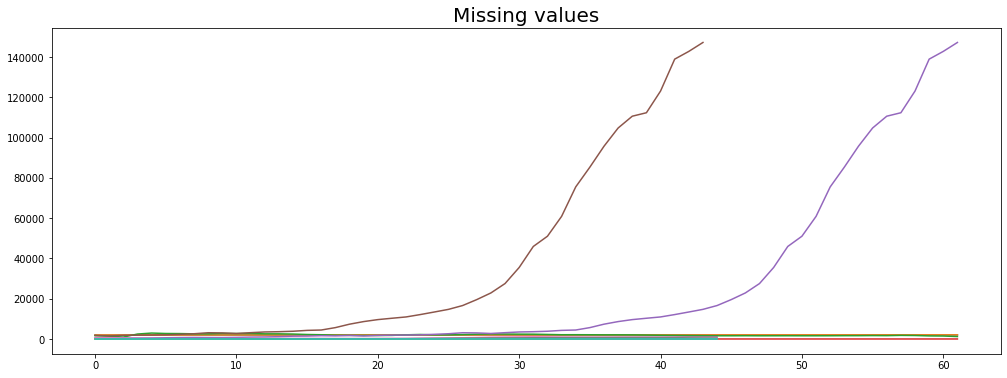

In [8]:
plt.rcParams['figure.figsize'] = (17, 6)
plt.plot(df)
plt.title('Missing values', fontsize = 20)
plt.show()

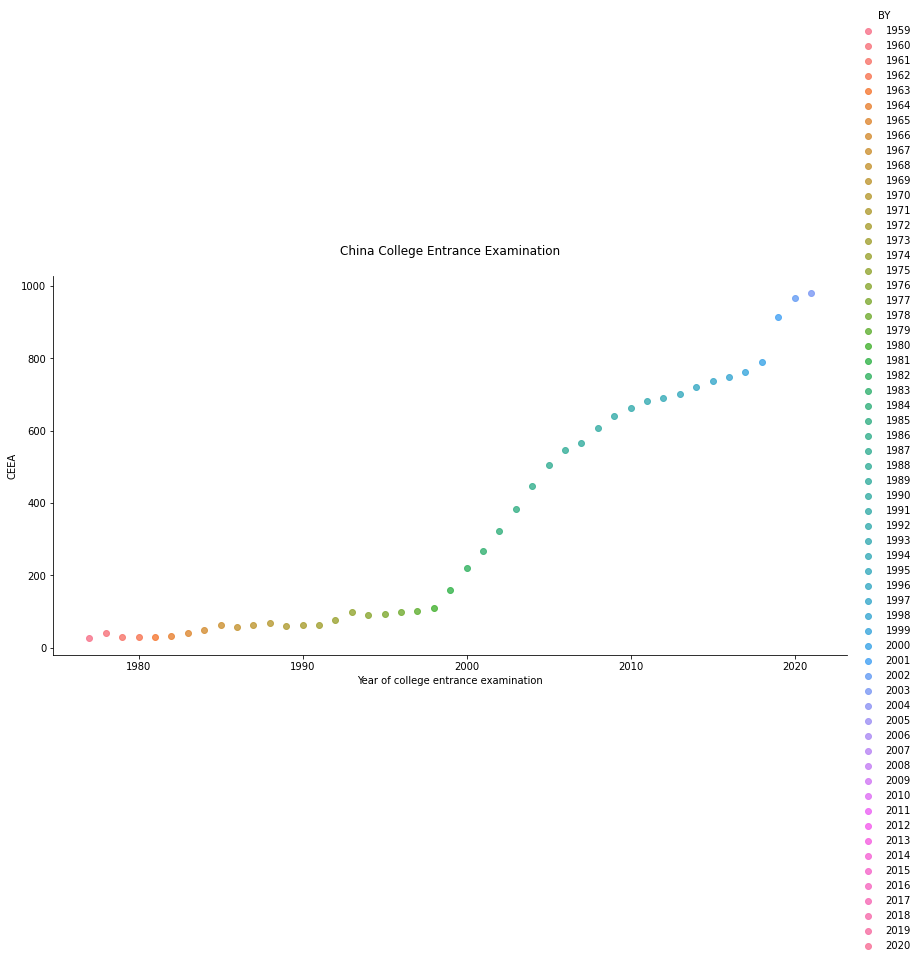

In [9]:
sns.lmplot(x='CEEY', y='CEEA', data=df, hue='BY', height=6, aspect=2, fit_reg=True)
plt.title('China College Entrance Examination\n')
plt.xlabel('Year of college entrance examination');

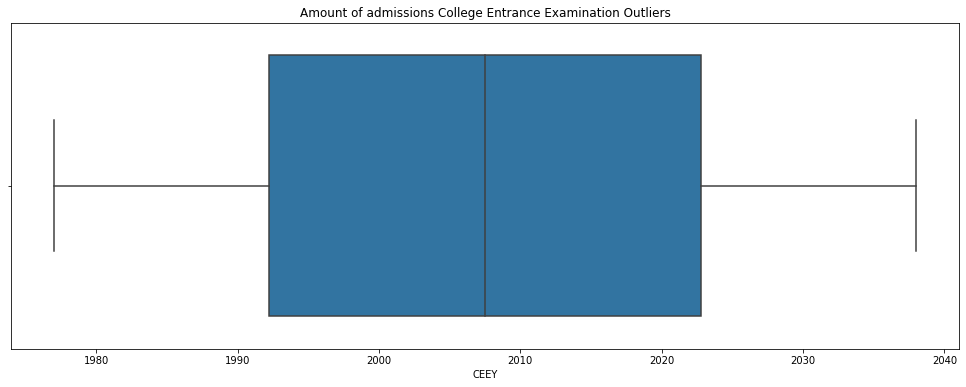

In [10]:
sns.boxplot(df_most_frequent['CEEY'])
plt.title('Amount of admissions College Entrance Examination Outliers')
plt.show()

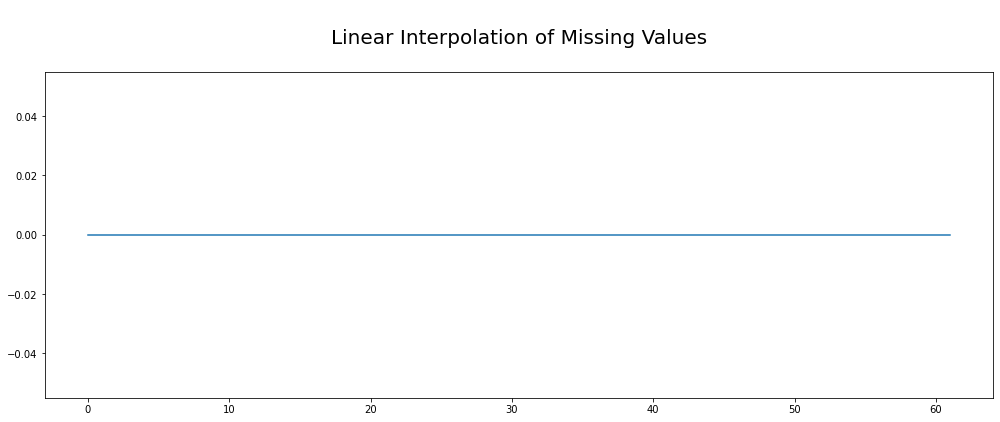

In [11]:
df_most_frequent['CEEAR_linear'] = df_most_frequent['CEEAR'].interpolate(method = 'linear')
plt.plot(df_most_frequent['CEEAR_linear'])
plt.title('\nLinear Interpolation of Missing Values\n', fontsize = 20)
plt.show()

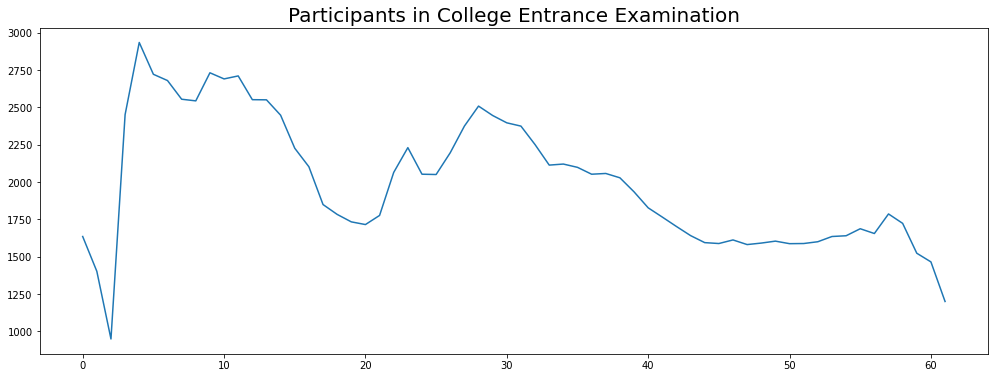

In [12]:
df_most_frequent['NBP'].plot()
plt.title('Participants in College Entrance Examination', fontsize=20);

In [13]:
from statsmodels.tsa.stattools import kpss

result = kpss(df_most_frequent['NBP'])
print(f"KPSS Statistics: {result[0]}")
print(f"p-value: {result[1]}")
print(f"num_lags: {result[2]}")
for key, value in result[3].items():
    print('Critical Values:')
    print(f"{key}, {value}")

KPSS Statistics: 0.6898089383690144
p-value: 0.014471914693725966
num_lags: 4
Critical Values:
10%, 0.347
Critical Values:
5%, 0.463
Critical Values:
2.5%, 0.574
Critical Values:
1%, 0.739


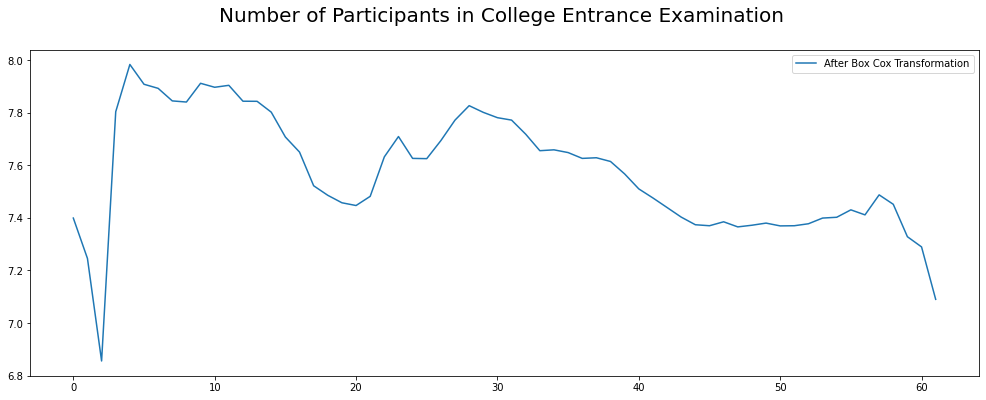

In [14]:
from scipy.stats import boxcox

plt.rcParams['figure.figsize'] = (17, 6)
data_boxcox = pd.Series(boxcox(df_most_frequent['NBP'], lmbda = 0), index = df.index)
plt.plot(data_boxcox, label  = 'After Box Cox Transformation')

plt.legend()
plt.title('Number of Participants in College Entrance Examination \n', fontsize = 20)
plt.show()

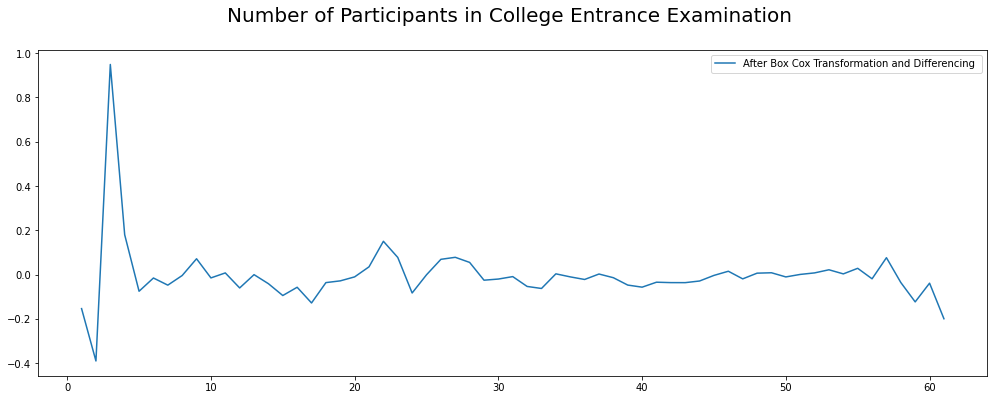

In [15]:
data_boxcox_difference = pd.Series(data_boxcox - data_boxcox.shift(), index = df.index)
data_boxcox_difference.dropna(inplace = True)
plt.plot(data_boxcox_difference, label = 'After Box Cox Transformation and Differencing ')

plt.legend()
plt.title('Number of Participants in College Entrance Examination \n', fontsize = 20)
plt.show()

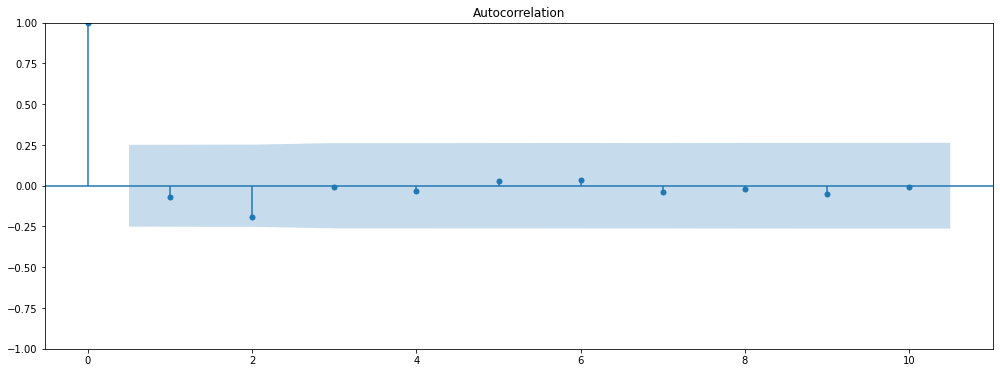

In [16]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(data_boxcox_difference, ax = plt.gca(), lags = 10)
plt.show()

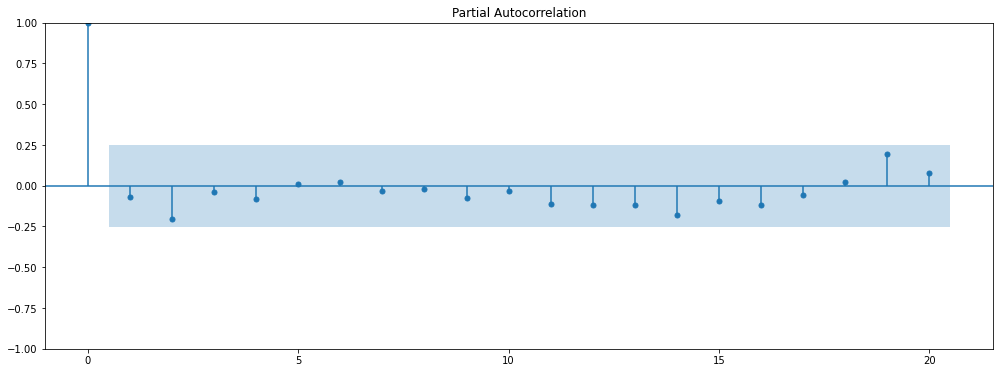

In [17]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(data_boxcox_difference, ax = plt.gca(), lags = 20)#requested nlags 30 must be < 30
plt.show()

In [18]:
length_train = 115

train_data_boxcox = data_boxcox[:length_train]
test_data_boxcox = data_boxcox[length_train:]

train_data_boxcox_difference = data_boxcox_difference[:length_train-1]
test_data_boxcox_difference = data_boxcox_difference[length_train-1:]

In [22]:
length_train = 115
train = df_most_frequent.iloc[:length_train, :]
test = df_most_frequent.iloc[length_train:, :]